In [1]:
# Compare Copy-scAT results to permutation test results

In [31]:
import pandas as pd
import os
os.chdir('/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/2021-08-27_Kazachkova')
import upsetplot
import matplotlib.pyplot as plt

copy-scAT  permutation test
False      False                 54
           True                4051
True       False                  0
           True                2049
dtype: int64

<Figure size 432x288 with 0 Axes>

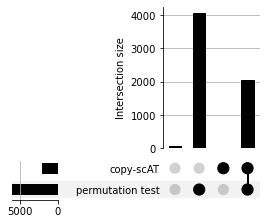

In [36]:
def read_copy_scat_results(ecDNA=None):
    path = 'Kazachkova_rotation_sp21/calls_5000_1e6.csv'
    df = pd.read_csv(path,index_col=0)
    if ecDNA is not None:
        if ecDNA == 1:
            df = df[['chr1_83000000.chr1_96000000']]
        elif ecDNA == 2:
            df = df[['chr7_0.chr7_8000000','chr7_86000000.chr7_96000000','chr7_98000000.chr7_107000000',
                     'chr7_125000000.chr7_131000000','chr7_41000000.chr7_55000000','chr7_32000000.chr7_35000000']]
        else:
            raise ValueError("ecDNA must be 1 or 2.")
    return df

def read_permutation_test_results(ecDNA=None):
    path='../2021-08-17_featurecounts-permutation-2/RCMB56-pdx_cell-classifications.tsv'
    df = pd.read_csv(path,sep='\t',index_col=0)
    if ecDNA is not None:
        if ecDNA == 1:
            df = df[['ecDNA1']]
        elif ecDNA == 2:
            df = df[['ecDNA2']]
        elif ecDNA == 3:
            df = df[['ecDNA3']]
        else:
            raise ValueError("ecDNA must be 1 2 or 3")
    return df

def plot_upset(df):
    _00 = df[~df['copy-scAT'] & ~df['permutation test']]
    _01 = df[~df['copy-scAT'] & df['permutation test']]
    _10 = df[df['copy-scAT'] & ~df['permutation test']]
    _11 = df[df['copy-scAT'] & df['permutation test']]
    data = upsetplot.from_memberships(
    [[],
     ['permutation test'],
     ['copy-scAT'],
     ['permutation test','copy-scAT']
    ],
        data=[len(_00),len(_01),len(_10),len(_11)]
    )
    plt.figure()
    upsetplot.plot(data)
    return data

def plot_upset_ecDNA1():
    df1 = read_copy_scat_results(1)
    df2 = read_permutation_test_results(1)
    df = df1.join(df2,how='inner')
    df.columns = ['copy-scAT','permutation test']
    data = plot_upset(df)
    plt.savefig('upset_ecDNA1.png')
    return data

plot_upset_ecDNA1()

copy-scAT  permutation test
False      False                  0
           True                3982
True       False                  0
           True                2172
dtype: int64

<Figure size 432x288 with 0 Axes>

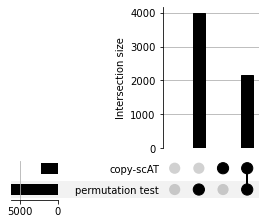

In [37]:
def plot_upset_ecDNA23():
    df = read_copy_scat_results(2)
    df = df.apply(lambda x: x.any(),axis=1)
    df2 = read_permutation_test_results(2).join(read_permutation_test_results(3))
    df2 = df2.apply(lambda x: x.any(),axis=1)
    df = pd.concat([df,df2],axis=1,join='inner')
    df.columns = ['copy-scAT','permutation test']
    data = plot_upset(df)
    plt.savefig('upset_ecDNA23.png')
    return data
plot_upset_ecDNA23()